

# Project: Investigate TMDB Movies Dataset 


<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. With this data we can analyse the top popular movies, famous directors, famous genres across the years

In [1]:

# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import squarify as sq

# Remember to include a 'magic word' so that your visualizations are plotted
% matplotlib inline
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [44]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('D:/Users/veluru.n/Desktop/Data_Analysis_Project/tmdb-movies.csv')
df.info()
# Dropping null value
df= df.dropna()
#Checking if there are any null values
df.isnull().sum().any()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1



### Data Cleaning (Removing the duplicates if any and dropping columns which are not required for analysis)

In [3]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

df.duplicated(subset='id').sum()

#Dropping the unnecessary columns
df.drop(['budget','revenue','homepage','tagline','overview','keywords'],axis=1,inplace=True)


<a id='eda'></a>
## Exploratory Data Analysis

Data will be analysed to answer the below questions. We will try to find the top 5 actors by number of movies acted, the most profitable movie etc..

### Research Question 1 (How many samples and columns are there in the data set post the data cleaning,mean revenue yearwise)

In [4]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
print('The number of samples are {} and the number of columns are {}'.format(df.shape[0],df.shape[1]))

The number of samples are 1992 and the number of columns are 15


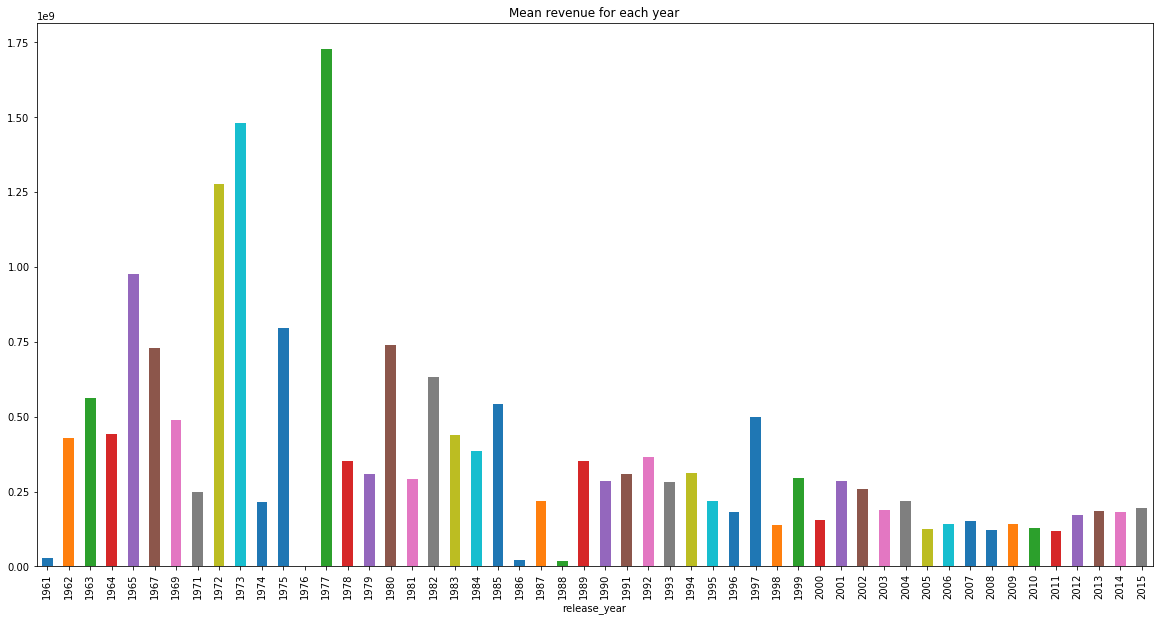

In [52]:
#Calculating the mean revenue year on year
df.groupby('release_year')['revenue_adj'].mean().plot(title='Mean revenue for each year',kind='bar',figsize=(20,10))

### Research Question 2  (What is the most popular title)

In [5]:
# Finding the most popular movie by using the popularity column

max_popularity=df.loc[df['popularity'].idxmax()]

print('The most popular movie is {}'.format(max_popularity['original_title']))

The most popular movie is Jurassic World


<a id='eda'></a>
<font size="4" color="blue">Research Question 3 (Find the top 5 actors who acted in most movies)</font>

In [7]:
#Creating a function to split the column values with the separator |. This same function can be used 
#for splitting various columns

def split_data(column_name):
    
    df_sep = df[column_name].str.cat(sep = '|')
    newrows=[]
    
    #giving pandas series and storing the values separately
    df_sep = pd.Series(df_sep.split('|'))
    newrows.append(df_sep)
      
    return newrows

In [8]:
#Splitting the column values and storing in different lists
target_columns = ['cast','genres','production_companies']
new_cast = split_data('cast')
new_genres = split_data('genres')
new_production=split_data('production_companies')
a=pd.DataFrame(new_cast).transpose()

#converting the lists into dataframes
b=pd.DataFrame(new_genres).transpose()
c=pd.DataFrame(new_production).transpose()
a.columns=['cast']
b.columns=['genres']
c.columns=['production_companies']

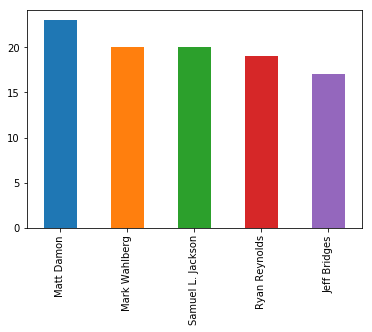

In [9]:
#Top 5 actors who acted in most number of movies
ind=a['cast'].value_counts().index

#Plotting the result
a['cast'].value_counts()[ind].nlargest(5).plot(kind='bar')

<font size="4" color="blue">Research Question 4 (Find the most profitable movies)</font>

In [46]:
#Calculating the return on investment(ROI) for the movies by using revenue and budget 
df.insert(3, 'ROI', ((df['revenue_adj']-df['budget_adj'])/df['budget_adj'])*100)

#Removing the rows with budget values 0
df = df[df.budget_adj != 0]
df.isnull().sum()
df.head(5)
g=df.nlargest(5,'ROI')
print('The top 5 highest return on investment movies are \n {}'.format(g['original_title'],index=False))

The top 5 highest return on investment movies are 
 3608         From Prada to Nada
7447        Paranormal Activity
2449    The Blair Witch Project
3581    Love, Wedding, Marriage
242                 The Gallows
Name: original_title, dtype: object


In [47]:
#The directors who directed the most profitable movies
g=df.nlargest(5,'ROI')
print('The directors of top 5 highest return on investment movies are \n {}'.format(g['director'],index=False))

The directors of top 5 highest return on investment movies are 
 3608                      Angel Gracia
7447                         Oren Peli
2449    Daniel Myrick|Eduardo SÃ¡nchez
3581                   Dermot Mulroney
242          Travis Cluff|Chris Lofing
Name: director, dtype: object


<font size="4" color="blue">Research question 5 - Find the popular genres year on year</font>

In [13]:
#Loading the data and removing nulls
gf = pd.read_csv('D:/Users/veluru.n/Desktop/Data_Analysis_Project/tmdb-movies.csv')
# Dropping null value
gf= gf.dropna()
#Checking if there are any null values
gf.isnull().sum().any()

False

In [14]:
#Dropping the unnecessary columns
gf.drop(['budget','revenue','homepage','tagline','overview','keywords','director','cast','production_companies'],axis=1,inplace=True)
gf.head(5)

,id,imdb_id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


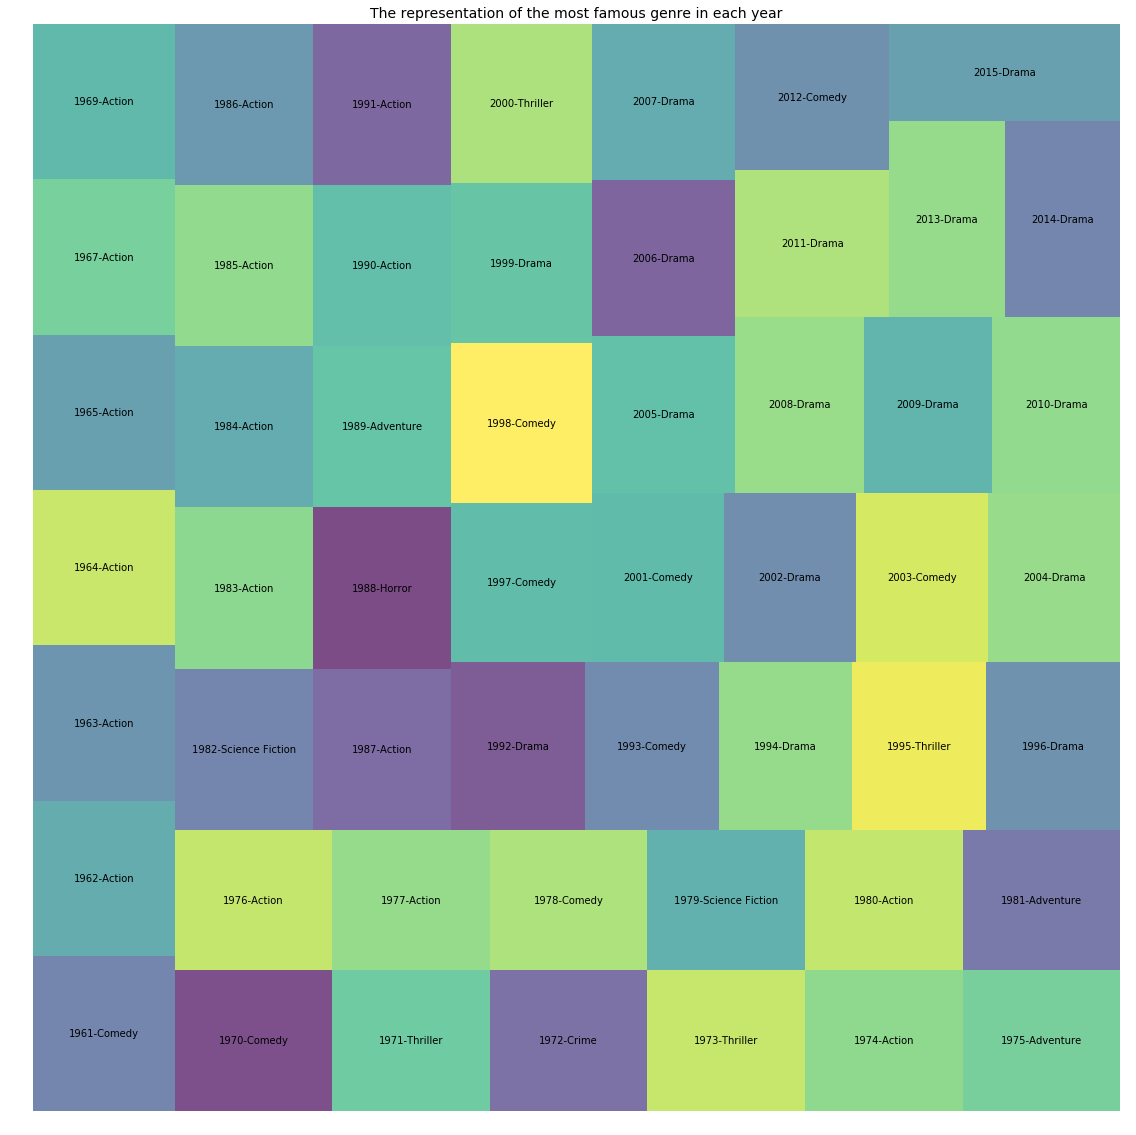

In [42]:
#Splitting the values in genres column
b1 = pd.DataFrame(gf.genres.str.split('|').tolist(), index=gf.id).stack()
b1 = b1.reset_index()[[0, 'id']]
b1.columns = ['genres', 'id']
b1.head(5)
b2= pd.DataFrame()
b2['release_year']= gf['release_year']
b2['id'] = gf['id']
b3=b2.merge(b1,how='left', left_on='id', right_on='id')
b4 = b3.groupby(['release_year', 'genres'], as_index=False)['id'].count()
b4=b4.rename(columns={"id":"count"})

#Finding the most popular genre by the number of movies created in each year
b4=b4.loc[b4.groupby('release_year')['count'].idxmax()]

#Plotting the treemap with the results
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, aspect="equal")
b4["value"] = b4["release_year"].map(str) +'-'+ b4["genres"]
labels = b4['value']
ax=sq.plot(sizes=b4['release_year'],label=labels,alpha=0.7)
ax.set_title("The representation of the most famous genre in each year", fontsize=14)
plt.axis('off')
plt.show()

<a id='conclusions'></a>
## Conclusions

1) The number of samples given in the dataset are 10866 and the number of columns are 21

2) The most popular movie is Jurassic World

3) Matt Damon acted in most number of movies after the data cleaning

4) The highest return on investment is noticed for the movie "From Prada to Nada"

5) "Drama" genre is the most popular in the recent times[2000s] although "Action" genre was famous in the 80s-90s

